In [55]:
#-----------------------------------------------------------------------
# diagonal.py
# Author: Rebecca Barber
# 
# simulates the expected revenue given the flow discussed in meeting
# on 2/11. see notes for more details
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 
from matplotlib import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [2]:
# draws value from ER curve
def er_draw():
	q = random()
	return 1/(1-q)

# draws d values from the ER curve
def draw_vals(d):
	vals = []
	for i in range(d):
		draw = er_draw()
		vals.append(draw)
	return vals

# Flow Simulation

In [99]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def flow_sim(n, m, eps):

	# need to get n*m values
    vals = draw_vals(n*m)
    
    # divide into 2 cols
    col1 = vals[0:n]
    col2 = vals[n:len(vals)]
    assert len(col1) == len(col2), "columns aren't the same size"
    # print('\nitem 1:', col1)
    # print('item 1:', col2)
    
    # get largest "unstarred" value in each column
    # need to compute \sum_j \max_i {virt_val_ij} 
    # virt_val_ij = 0 if j is i's favorite item
    # otherwise, = formula below
    highest_virt_val_col1 = 0
    highest_virt_val_col2 = 0
    for i in range(len(col1)):
        
        val_col1 = col1[i]
        val_col2 = col2[i]
        
        # favorite val
        vf = val_col1 if val_col1 > val_col2 else val_col2
        # non-fav val
        vn = val_col2 if val_col1 > val_col2 else val_col1
        
        # print('max_val:', max_val, 'other_val:', other_val)
        
        # item 1 is the favorite item (max)
        # item 2 is "other"
        if val_col1 > val_col2:
            virt_val_col1 = sqrt(val_col1)
            virt_val_col2 = log(val_col2)
            # virt_val_col2 = (vn**3 * (1-vf) + vn*vf**2 * (vn-1)) / (vf**2 * (vn-1) - eps * vn**2 * vf* (vf-1))
        # item 1 is "other"
        # item 2 is the favorite item (max)
        else: 
            virt_val_col2 = sqrt(val_col2)
            virt_val_col1 = log(val_col1)
            # virt_val_col1 = (vn**3 * (1-vf) + vn*vf**2 * (vn-1)) / (vf**2 * (vn-1) - eps * vn**2 * vf* (vf-1))
            
        # print('virt_val_col1:', virt_val_col1, 'virt_val_col2:', virt_val_col2, '\n')
            
        if virt_val_col1 > highest_virt_val_col1: 
            highest_virt_val_col1 = virt_val_col1
        if virt_val_col2 > highest_virt_val_col2: 
            highest_virt_val_col2 = virt_val_col2
            
    # print('highest_virt_val_col1:', highest_virt_val_col1, 'highest_virt_val_col2:', highest_virt_val_col2)

    return highest_virt_val_col2 + highest_virt_val_col2

# Variable Updates

In [100]:
num_trials = 5000# 200000
min_bidders = 100
max_bidders = 500 #1000
bidder_step = 10
num_items = 2
eps = 1/1000000

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [101]:
avg_revs = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_revs = []
    for i in range(num_trials):
        rev = flow_sim(n, num_items, eps)
        all_revs.append(rev)       
    mean_rev = mean(all_revs)
    avg_revs.append(mean_rev)
    print(': ', mean_rev)

# save all of the data
csv_file = './data/scratch_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg rev'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_rev = avg_revs[i]
    df = df.append({'num bidders': n, 'avg rev': avg_rev}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
100:  34.02707410235025
110:  36.611359113200045
120:  37.22489682031801
130:  41.292985118175515
140:  41.55595505612159
150:  41.879563456223195
160:  45.81889695605122
170:  47.611565380319895
180:  46.50215328010023
190:  48.43013502480367
200:  50.43796431720241
210:  51.01428194074909
220:  52.40197784516886
230:  55.839754302636784
240:  56.02855339821285
250:  56.24906031494665
260:  56.56806573012387
270:  57.923174680559214
280:  59.34172088085366
290:  61.41122693260824
300:  59.404448304646834
310:  60.53743629026125
320:  64.2017382839093
330:  64.94938480605144
340:  64.06812019078068
350:  68.50863269182979
360:  77.97858960658532
370:  67.11694965835237
380:  66.67244490804273
390:  70.91282621255316
400:  71.73861514301633
410:  72.33711486185271
420:  71.51523358163398
430:  73.1007369827906
440:  73.71850572580215
450:  75.53741999405301
460:  79.58678564587085
470:  76.63214388705875
480:  79.18209487016469
490:  76.27441194060292
500:  78.6756619

# Plotting

<Figure size 648x648 with 0 Axes>

Text(0.5, 1.0, '$\\Phi^\\lambda_{i\\alpha} (\\vec{v}_i) = \\sqrt{v_{i\\alpha}}$ and $\\Phi^\\lambda_{i\\beta} (\\vec{v}_i) = \\log{(v_{i\\beta})}$')

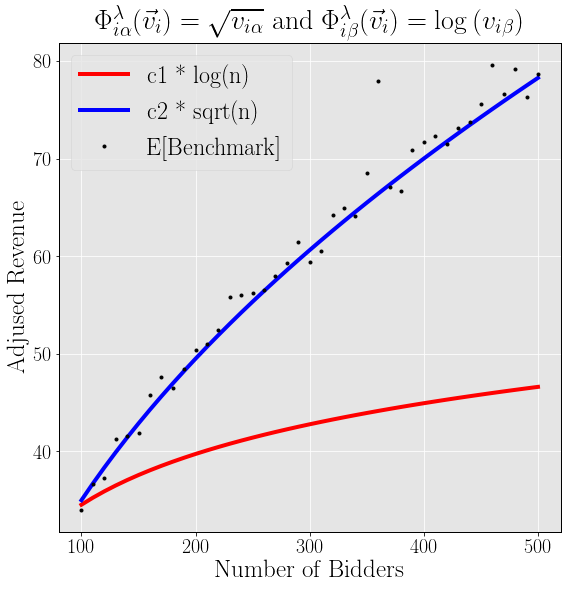

In [102]:
# plot the results
log_bench = [7.5*np.log(n) for n in num_bidders]
sqrt_bench = [3.5*np.sqrt(n) for n in num_bidders]

figure_name = './figures/scratch_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

plt.style.use('ggplot')
plt.rc('text', usetex=True)
plt.figure(figsize=(9,9))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_revs,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c1 * log(n)', 'c2 * sqrt(n)', 'E[Benchmark]'], fontsize = 24)
xlab = plt.xlabel('Number of Bidders', fontsize=25)
ylab = plt.ylabel('Adjused Revenue', fontsize=25)
xlab.set_color('black')
ylab.set_color('black')
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.title(r'$\Phi^\lambda_{i\alpha} (\vec{v}_i) = \sqrt{v_{i\alpha}}$ and $\Phi^\lambda_{i\beta} (\vec{v}_i) = \log{(v_{i\beta})}$',
         fontsize = 28)
# plt.title(r"$\displaystyle $\Phi^\lambda_{i\alpha} (\vec{v}_i) = \sqrt{v_{i\alpha}} \text { and } \Phi^\lambda_{i\beta} (\vec{v}_i) = \sqrt{v_{i\beta}}$",
#           fontsize=24)

In [98]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_revs, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 6.031869396766106 
b = -14.413511782890668 
error = 5.4799931862459115

sqrt fit: 
a = 0.7645295454417796 
b = 6.479009134705294 
error = 2.197797256300773


In [130]:
2.0**(3/4)

1.681792830507429

In [152]:
from sympy import *

In [167]:
c = symbols('c')
v1, q1, v1p, q1p = symbols('v1 q1 v1p q1p')

c = 1-q1

In [165]:


q1p = q1 - c

q1 = 1 - 1/v1
v1p = 1/(1-q1p)

In [166]:
simplify(v1p)

-1/(2*q1 - 2)

In [233]:
eps = 1/1000000 

4.1485654594408236e-23 0
1.0000000000414856e-12 1e-12
2.0000000000414854e-12 2e-12
3.0000000000414856e-12 3e-12
4.000000000041486e-12 4e-12
5.0000000000414856e-12 5e-12
6.0000000000414845e-12 5.9999999999999995e-12
7.000000000041486e-12 6.999999999999999e-12
8.000000000041485e-12 8e-12
9.000000000041485e-12 9e-12
1.0000000000041486e-11 1e-11
1.1000000000041486e-11 1.0999999999999999e-11
1.2000000000041484e-11 1.1999999999999999e-11
1.3000000000041485e-11 1.2999999999999999e-11
1.4000000000041485e-11 1.3999999999999999e-11
1.5000000000041485e-11 1.5e-11
1.6000000000041485e-11 1.6e-11
1.7000000000041485e-11 1.7e-11
1.8000000000041484e-11 1.8e-11
1.9000000000041484e-11 1.9e-11


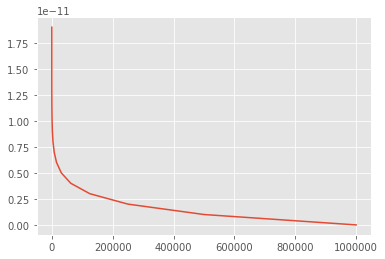

In [234]:
quantiles = []
this_quantile = 1-eps
while this_quantile >= 0:
    quantiles.append(this_quantile)
    this_quantile = 2 * this_quantile - 1

vals = []
for i in range(len(quantiles)):
    this_val = 1 / (1-quantiles[i])
    vals.append(this_val)

flows = []
this_flow = 0
for i in range(len(quantiles)):
    flows.append(this_flow)
    this_flow += eps**2


test = [log(1/(eps* v), 2) * eps**2 for v in vals]
for i in range(len(vals)):
    temp = 1/(eps* vals[i])
    theoretical = math.log(temp, 2) * eps**2
    print(theoretical, flows[i])
    
plt.plot(vals, flows)

In [185]:
from scipy.optimize import curve_fit
def log_func(x, a, b):
    return a*np.log(x)+ b

In [187]:
log_param, log_param_cov = curve_fit(log_func, vals, flows) 
log_param
log_param_cov

array([-0.01442695,  0.03321928])

array([[ 5.01071355e-36, -6.32785135e-36],
       [-6.32785135e-36,  1.10004832e-35]])

In [196]:
eps = 1/1000000

In [200]:
vals = [i for i in range(1,1000)]
phi = [v - v/2 * log(1/(eps*v)) for v in vals]
phi

[-5.90775527898214,
 -11.1223633774043,
 -16.0753474039442,
 -20.8584323936888,
 -25.5151816138254,
 -30.0712532662087,
 -34.5436014311814,
 -38.9442760651377,
 -43.2822869128263,
 -47.5646273248511,
 -51.7968840684125,
 -55.9836234490576,
 -60.1286478032678,
 -64.2351725984431,
 -68.3059526764655,
 -72.3433746857959,
 -76.3495263182185,
 -80.3262492006130,
 -84.2751799985794,
 -88.1977828441028,
 -92.0953752625289,
 -95.9691491506655,
 -99.8201879334039,
 -103.649480731396,
 -107.457934163701,
 -111.246382259256,
 -115.015594841459,
 -118.766284669047,
 -122.499113555678,
 -126.214697644532,
 -129.913611978926,
 -133.596394482633,
 -137.263549442214,
 -140.915550566918,
 -144.552843688310,
 -148.175849151147,
 -151.784963938421,
 -155.380563566520,
 -158.963003780775,
 -162.532622077007,
 -166.089739070829,
 -169.634659733299,
 -173.167674508820,
 -176.689060329012,
 -180.199081534364,
 -183.697990713929,
 -187.186029471974,
 -190.663429129353,
 -194.130411366414,
 -197.587188813403,


[10.000000000000002,
 5.000000000000001,
 3.333333333333334,
 2.5000000000000004,
 2.0000000000000004,
 1.666666666666667,
 1.4285714285714288,
 1.2500000000000002,
 1.1111111111111112,
 1.0000000000000002]

[-3.469446951953614e-18,
 0.009999999999999995,
 0.019999999999999993,
 0.029999999999999992,
 0.03999999999999999,
 0.04999999999999999,
 0.05999999999999999,
 0.06999999999999998,
 0.07999999999999999,
 0.08999999999999997]

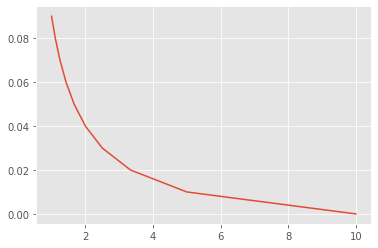

In [232]:
#plt.plot(vals, flows)
eps = 1/10
quantiles_diag = []
this_quantile = 1-eps
while this_quantile >= 0:
    quantiles_diag.append(this_quantile)
    this_quantile = this_quantile - eps

vals_diag = []
for i in range(len(quantiles_diag)):
    this_val = 1 / (1-quantiles_diag[i])
    vals_diag.append(this_val)

flows_diag = []
for i in range(len(vals_diag)):
    flows_diag.append(eps/vals_diag[i] - eps**2)
plt.plot(vals_diag, flows_diag)

vals_diag
flows_diag

In [39]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

1.0

array([[0.18920712]])

array([-3.49245965e-10])

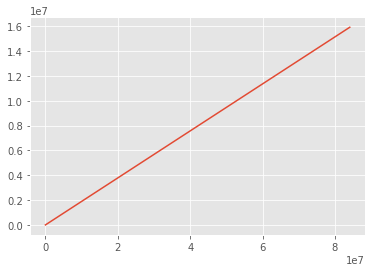

In [53]:
## I'm going to try to play around, it's 2/24 for reference

eps = 1/100000000

x = []
vals = []
single_vals = []
flows = []
this_val = [1/eps, 1/eps]
this_single_val = 1/eps
this_flow = 0
i = 1

while True:
    vals.append(this_val)
    flows.append(this_flow)
    single_vals.append(this_single_val)
    x.append(i)
    
    pdf = (1/this_val[0])**2 * (1/this_val[1])**2
    this_flow += pdf
    
    new_val = (1/this_flow)**(1/4)
    if new_val < 1: break
        
    this_val = [new_val, new_val]
    this_single_val = new_val
    i += 1

difs = [single_vals[i]-single_vals[i+1] for i in range(1, len(single_vals)-1)]
plt.plot(single_vals[2:len(single_vals)], difs)

single_vals_reg = np.array(single_vals[2:len(single_vals)]).reshape(-1, 1) 
difs_reg = np.array(difs).reshape(-1, 1) 

# for i in range(len(difs)):
#     print(single_vals[i+1], difs[i])
    
reg = LinearRegression() 
reg.fit(single_vals_reg, difs_reg)
reg.score(single_vals_reg, difs_reg)
reg.coef_
reg.intercept_

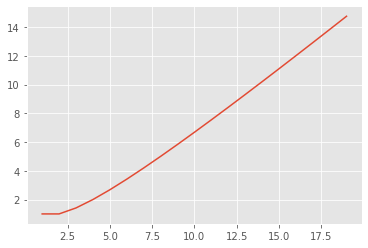

In [61]:
x = [i for i in range(1, 20)]
y = [i-log(i,2) for i in range(1, 20)]
plt.plot(x,y)


$$v_{ij}' - v_{ij} =  v_{ij} - log(v_{ij})$$

1 0.07806660111416378 1.0
2.0 0.01556660111416378 0.0625
3.0 0.003220922101818102 0.012345679012345678
4.415037499278844 0.0005890643443930349 0.002631857757425067
6.68764930705 8.913798571991117e-05 0.0004999263586731237
10.63379941803365 1.0930892650669724e-05 7.820709306924145e-05
17.857013582486246 1.0961118628706167e-06 9.834780787799108e-06
31.55560824662455 8.75703550728491e-08 1.0085415077977677e-06
58.13139196619475 0 8.75703550728491e-08


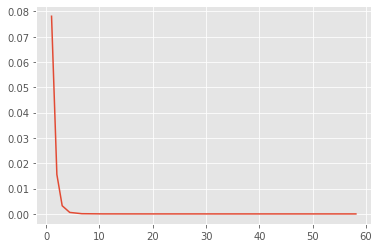

In [82]:
eps = 1/100
vals = []
v = 1
while v < 1/eps:
    vals.append(v)
    v = 2*v - log(v,2)
    
flows = []
this_flow = 0
for i in range(len(vals)):
    flows.insert(0,this_flow)
    this_val = vals[len(vals)-1-i]
    this_flow += 1/(this_val**4)
    
for i in range(len(vals)):
    print(vals[i], flows[i], 1/vals[i]**4)
plt.plot(vals, flows)